In [2]:
import funzioni02 as f2
import funzioni01 as f1
import qiskit.quantum_info as qi
import numpy as np
import qiskit.ignis.mitigation.measurement as mc
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute
from qiskit.providers.aer import AerSimulator, QasmSimulator
from qiskit.opflow import Zero, One, I, X, Y, Z
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})  # enlarge matplotlib fonts
plt.rcParams['figure.figsize'] = [12, 8]


In [3]:
def print_dati(name="",columns=[], dev="yes",linestyle=':',marker="*",labels=[]):
    
    f=open(name, "r")

    tempi=[]
    dati=[]
    dati_dev=[]

    i=0
    for x in f:
        if x[0]!="#":
            y=x.split(" ")
            tempi.append(float(y[0]))
            dati.append([])
            dati_dev.append([])
            for j in columns:
                dati[i].append(float(y[j]))
                dati_dev[i].append(float(y[j+1]))
            i+=1

    y=np.zeros([len(dati),len(dati[0])])
    dy=np.zeros([len(dati),len(dati[0])])

    print(len(dati[0]))

    for i in range(len(dati)):
        for j in range(len(dati[0])):
            y[i][j]=dati[i][j]
            dy[i][j]=dati_dev[i][j]


    for i in range(len(dati[0])):
        plt.errorbar(tempi, y[:,i],dy[:,i],linestyle=linestyle,marker=marker,label=labels[i])
        
    return


4


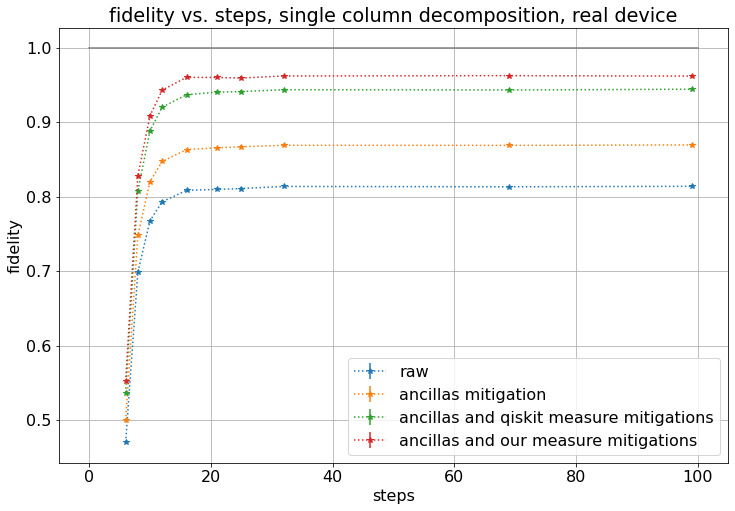

In [10]:
lables=["raw", "ancillas mitigation", "ancillas and qiskit measure mitigations", "ancillas and our measure mitigations"]

print_dati("dati/fid_vs_steps_06-03_simu_01.txt", columns=[1,3,5,7], dev="yes",labels=lables)
#print_dati("dati/fid_vs_steps_19-02_02.txt", columns=[1,3,5,7], dev="yes",labels=lables)

plt.plot([0,100],[1,1],c="gray")

plt.xlabel("steps")
plt.ylabel("fidelity")
plt.title("fidelity vs. steps, single column decomposition, real device")

plt.legend()
plt.grid()

plt.show()